# Author : Manik Maheshwari
## Technical Task 5
## Exploratory Data Analysis - Sports (Level - Advanced)

In this task, I will be performing exploratory data analysis on the dataset "Sport" and try to find out the best team in IPL. Also, we will find the best bolwer and various insights.

The steps demonstrated in this notebook are:

 1. Loading the data
 2. Familiarizing with data
 3. Visualizing the data
 4. Data Analysis
 5. Conclusion

## 1. Loading Data:

   The dataset can be is there on my drive link https://drive.google.com/drive/folders/1sDrs2knKorrADX0R-14oGEc24Bchwiy-?usp=sharing. 

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Loading data into dataframe

data_deliveries = pd.read_csv('deliveries.csv')
data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#Loading data into dataframe

data_matches = pd.read_csv('matches.csv')
data_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 2. Familiarizing with Data:
In this step, few dataframe methods are used to look into the data and its features.

### *Analysing Deliveries Dataset*

In [5]:
#Shape of dataframe

data_deliveries.shape

(179078, 21)

In [6]:
#Listing the features of the dataset

data_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
#Information about the dataset

data_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
#checking for null value

data_deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [9]:
# describtion of dataset

data_deliveries.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,179078.0,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
over,179078.0,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
is_super_over,179078.0,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0
wide_runs,179078.0,0.036721,0.251161,0.0,0.0,0.0,0.0,5.0
bye_runs,179078.0,0.004936,0.116480,0.0,0.0,0.0,0.0,4.0
legbye_runs,179078.0,0.021136,0.194908,0.0,0.0,0.0,0.0,5.0
noball_runs,179078.0,0.004183,0.070492,0.0,0.0,0.0,0.0,5.0
penalty_runs,179078.0,0.000056,0.016709,0.0,0.0,0.0,0.0,5.0


In [10]:
#unique value in dataset

data_deliveries.nunique()                                    

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

### *Analysing Matches Dataset*

In [11]:
#Shape of dataframe

data_matches.shape

(756, 18)

In [12]:
#Listing the features of the dataset

data_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
#Information about the dataset

data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
#checking for null value

data_matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
# describtion of dataset

data_matches.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [16]:
#unique value in dataset

data_matches.nunique()                                    

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [17]:
data_matches.rename(columns={'win_by_runs':'Bat_1', 'win_by_wickets':'Ball_1'}, inplace=True)

In [18]:
print("City in which most matches have been won        :",data_matches['city'].value_counts().idxmax()) 
print("Team that has won most matches                  :",data_matches['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times :",data_matches['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1                          :" ,data_matches['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2                          :" ,data_matches['umpire2'].value_counts().idxmax())

City in which most matches have been won        : Mumbai
Team that has won most matches                  : Mumbai Indians
Player who has been man of the match most times : CH Gayle
Most frequent Umpire 1                          : HDPK Dharmasena
Most frequent Umpire 2                          : C Shamshuddin


In [19]:
data_matches['city'].fillna(value='Mumbai', inplace=True)
data_matches['winner'].fillna(value='Mumbai Indians', inplace=True)
data_matches['player_of_match'].fillna(value='CH Gayle', inplace=True)
data_matches['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
data_matches['umpire2'].fillna(value='C Shamshuddin', inplace=True)
data_matches['umpire3'].fillna(value='NA', inplace=True)

In [20]:
data_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
Bat_1              0
Ball_1             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [21]:
data_matches.duplicated().sum()

0

Here we do not have any duplicated values.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

### Finding Top Teams and Players

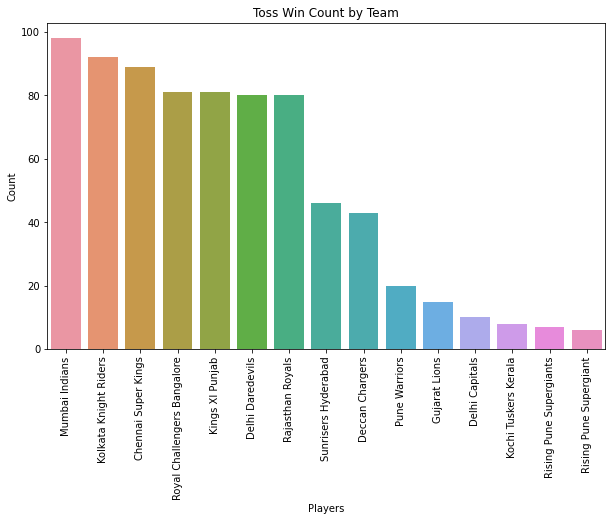

In [22]:
plt.figure(figsize=(10,6))
"""style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}"""
sns.barplot( data_matches['toss_winner'].value_counts().index,data_matches['toss_winner'].value_counts().values)
plt.title('Toss Win Count by Team' )
plt.xlabel('Players' )
plt.xticks(rotation=90)
plt.ylabel('Count' )
plt.show()

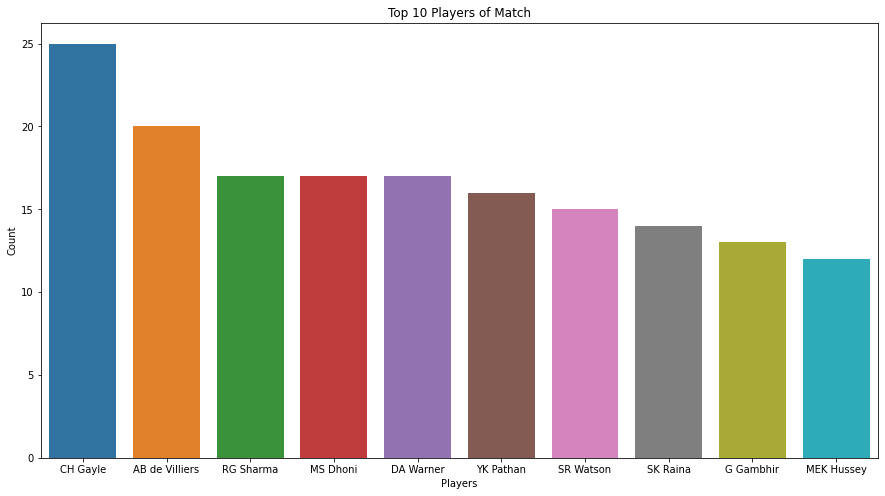

In [23]:
plt.subplots(figsize=(15,8))
"""style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}"""
sns.barplot(data_matches['player_of_match'].value_counts()[:10].index, data_matches['player_of_match'].value_counts()[:10].values)
plt.title('Top 10 Players of Match')
plt.xlabel('Players' )
plt.ylabel('Count')
plt.show()

Best Team is Mumbai Indians.
Best Player is CH Gayle.

### Finding the Factors Affecting the Victory

In [24]:
data_matches.corr().abs()

,id,season,dl_applied,Bat_1,Ball_1
id,1.000000,0.668304,0.011658,0.039403,0.012239
season,0.668304,1.000000,0.001116,0.037529,0.009379
dl_applied,0.011658,0.001116,1.000000,0.016349,0.011631
Bat_1,0.039403,0.037529,0.016349,1.000000,0.560420
Ball_1,0.012239,0.009379,0.011631,0.560420,1.000000


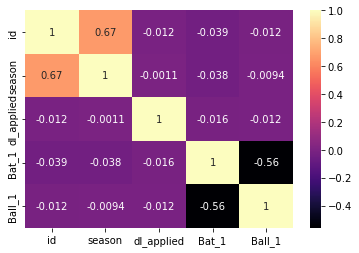

In [25]:
sns.heatmap(data_matches.corr(), annot=True, cmap='magma');

In [26]:
data_matches= data_matches.drop(['dl_applied', 'season'], axis=1)
data_matches.head()

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,2,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NA
2,3,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NA
3,4,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NA
4,5,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,NA


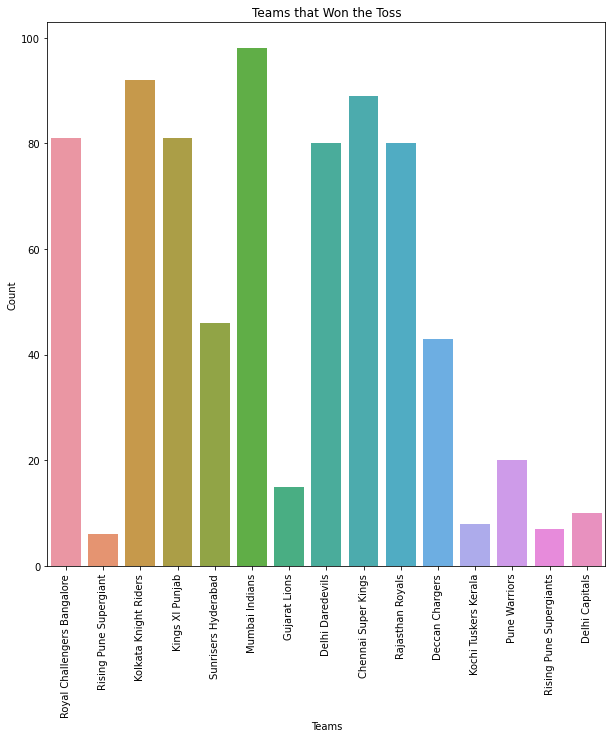

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(data_matches['toss_winner'])
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Teams that Won the Toss')
plt.xticks(rotation=90)
plt.show()

In [28]:
print('Team that won most matches by Batting First: ',data_matches.iloc[data_matches[data_matches['Bat_1'].ge(1)].Bat_1.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


## 4. Data Analysis:

### 4.1. Merging the two Datasets into a new Dataset and Reading it (join on match-id)

In [29]:
data_merge=pd.merge(data_deliveries, data_matches, left_on='match_id', right_on='id')
data_merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA


In [30]:
print('Shape:', data_merge.shape)
print('Size:', data_merge.size)

Shape: (179078, 37)
Size: 6625886


In [31]:
data_merge.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
Bat_1                    0
Ball_1                   0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
d

In [32]:
data_merge['player_dismissed'].fillna(value='NA', inplace=True)
data_merge.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed         0
dismissal_kind      170244
fielder             172630
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
Bat_1                    0
Ball_1                   0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
d

In [33]:
data_merge.duplicated().sum()

23

In [34]:
data_merge.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [35]:
data_merge.corr().abs()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,Bat_1,Ball_1
match_id,1.000000,0.003958,0.008268,0.001349,0.009150,0.007549,0.000905,0.012429,0.004623,0.001475,0.033510,0.013323,0.030727,1.000000,0.039757,0.005500
inning,0.003958,1.000000,0.050076,0.003943,0.084154,0.001201,0.000757,0.001996,0.000904,0.003442,0.005362,0.000531,0.005485,0.003958,0.000492,0.024391
over,0.008268,0.050076,1.000000,0.007424,0.034329,0.010003,0.012111,0.004764,0.016984,0.000979,0.086701,0.002479,0.086326,0.008268,0.004198,0.038424
ball,0.001349,0.003943,0.007424,1.000000,0.001143,0.004665,0.006602,0.002727,0.000567,0.000711,0.007950,0.002576,0.007414,0.001349,0.001216,0.002015
is_super_over,0.009150,0.084154,0.034329,0.001143,1.000000,0.001019,0.001353,0.001735,0.013640,0.000071,0.010125,0.003504,0.010891,0.009150,0.012258,0.020729
wide_runs,0.007549,0.001201,0.010003,0.004665,0.001019,1.000000,0.006196,0.015855,0.008675,0.012817,0.094579,0.720916,0.059077,0.007549,0.000093,0.005831
bye_runs,0.000905,0.000757,0.012111,0.006602,0.001353,0.006196,1.000000,0.004596,0.002515,0.000142,0.018936,0.332352,0.051946,0.000905,0.002362,0.004959
legbye_runs,0.012429,0.001996,0.004764,0.002727,0.001735,0.015855,0.004596,1.000000,0.006434,0.000362,0.070106,0.554458,0.048075,0.012429,0.003124,0.005205
noball_runs,0.004623,0.000904,0.016984,0.000567,0.013640,0.008675,0.002515,0.006434,1.000000,0.000198,0.004832,0.194899,0.046427,0.004623,0.003536,0.001300
penalty_runs,0.001475,0.003442,0.000979,0.000711,0.000071,0.012817,0.000142,0.000362,0.000198,1.000000,0.002591,0.057882,0.009755,0.001475,0.001926,0.004232


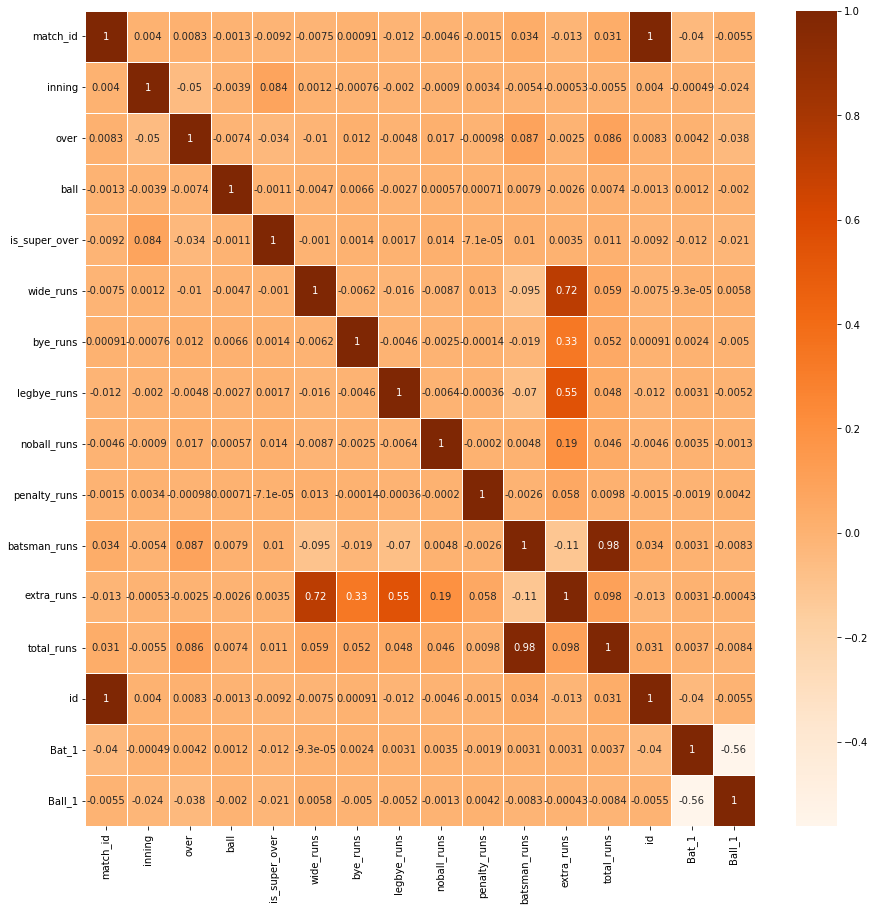

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data_merge.corr(), annot=True, linewidth=1, cmap='Oranges');

### Number of Matches Played in Each Stadium

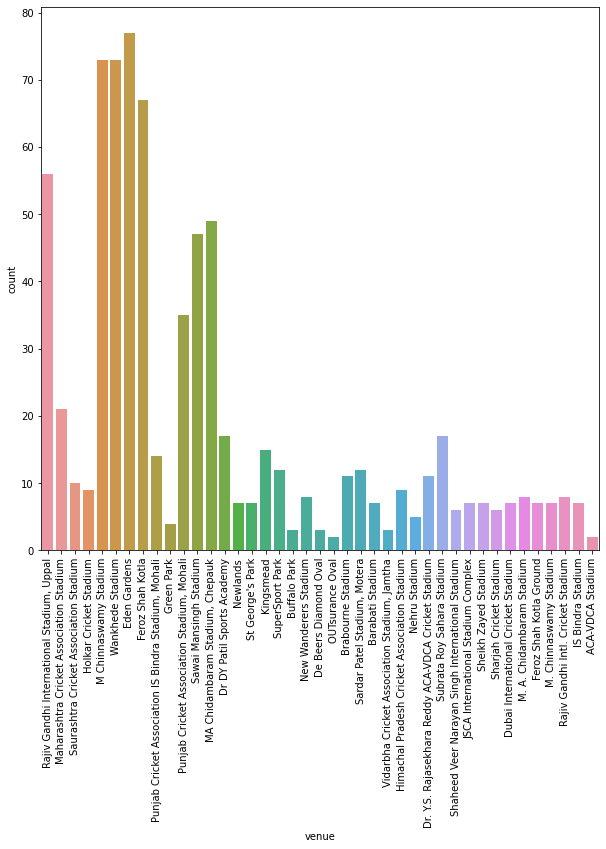

In [37]:
delivery=data_matches
delivery.venue.value_counts()

plt.figure(figsize=(10,10))
sns.countplot(data=delivery, x='venue')
plt.xticks(rotation=90)
plt.show()

Most matches have been played in Eden Gardens followed by Wankhede Stadium.
Teams who win toss choose to field first

In [38]:
team_stats = pd.DataFrame({'Total Matches played': data_matches.team1.value_counts() + data_matches.team2.value_counts(), 'Total won': data_matches.winner.value_counts(), 'Toss won': data_matches.toss_winner.value_counts(), 
                          'Total lost': ((data_matches.team1.value_counts() + data_matches.team2.value_counts()) - data_matches.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,113,98,74,0.60
9,Pune Warriors,46,12,20,34,0.26


### Maximum Toss Won

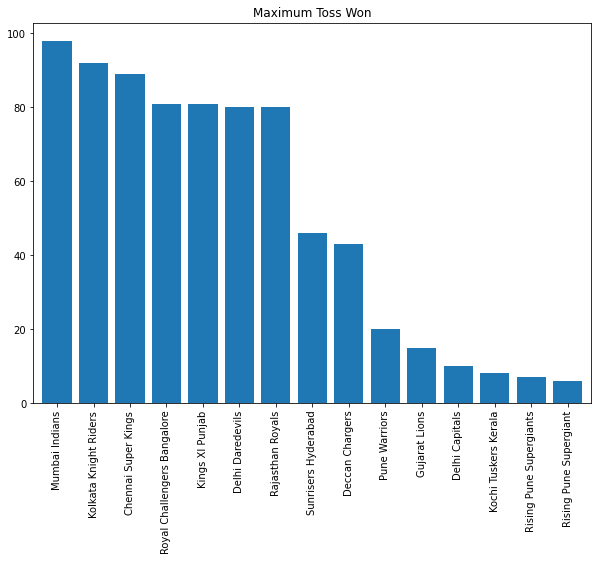

In [39]:
plt.subplots(figsize=(10,7))
data_matches['toss_winner'].value_counts().plot.bar(width=0.8)
plt.title("Maximum Toss Won");

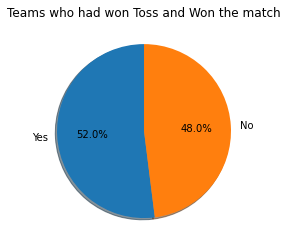

In [40]:
Tosswin_matchwin=data_matches[data_matches['toss_winner']==data_matches['winner']]
slices=[len(Tosswin_matchwin),(len(data_matches)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
plt.title("Teams who had won Toss and Won the match");



### Deciding Whether to Bat or Field After Winning the Toss

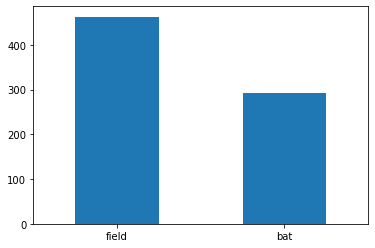

In [41]:
delivery.toss_decision.value_counts().plot(kind='bar')
plt.xticks(rotation=0);

### Relation between Winning toss and victory

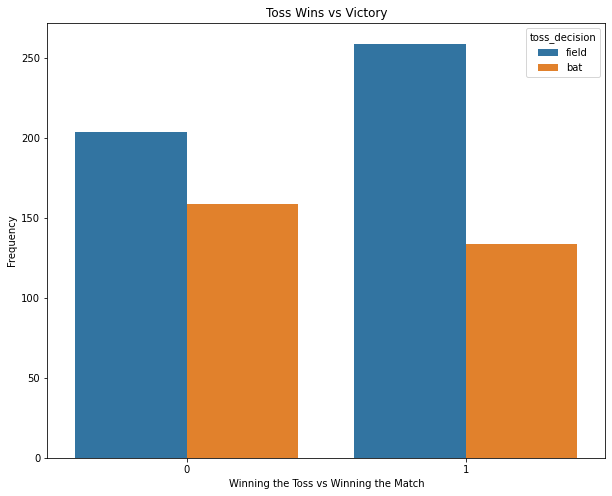

In [42]:
delivery
delivery['team_toss_win']=np.where((delivery.toss_winner==delivery.winner),1,0)
plt.figure(figsize=(10,8))
sns.countplot('team_toss_win', data=delivery, hue='toss_decision')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory");

Teams who choose to field after winning the toss have high chances of winning.

### Batsmen overview

In [43]:

batsmen = data_deliveries.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen = batsmen.sort_values(['balls','runs'], ascending=False)
batsmen['batting_strike_rate'] = batsmen['runs']/batsmen['balls'] * 100
batsmen['batting_strike_rate'] = batsmen['batting_strike_rate'].round(2)
batsmen.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [44]:
#utility function used later
def trybuild(lookuplist, buildlist):
    alist = []
    for i in buildlist.index:
        try:
            #print(i)
            alist.append(lookuplist[i])
            #print(alist)
        except KeyError:
            #print('except')
            alist.append(0)
    return alist

In [45]:
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [46]:
alist = []
for r in data_deliveries.batsman_runs.unique():
    lookuplist = data_deliveries[data_deliveries.batsman_runs == r].groupby('batsman')['batsman'].count()
    batsmen[str(r) + 's'] = trybuild(lookuplist, batsmen)
    try:
        alist.append(lookuplist[r])
    except KeyError:
        alist.append(0)
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman.head(10)

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s
batsman,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0


In [47]:
#Build a dictionary of Matches player by each batsman
played = {}
def BuildPlayedDict(x):
    #print(x.shape, x.shape[0], x.shape[1])
    for p in x.batsman.unique():
        if p in played:
            played[p] += 1
        else:
            played[p] = 1

data_deliveries.groupby('match_id').apply(BuildPlayedDict)
import operator

In [48]:
TopBatsman['matches_played'] = [played[p] for p in TopBatsman.index]
TopBatsman['average']= TopBatsman['runs']/TopBatsman['matches_played']

TopBatsman['6s/match'] = TopBatsman['6s']/TopBatsman['matches_played']  
TopBatsman['6s/match'].median()

TopBatsman['4s/match'] = TopBatsman['4s']/TopBatsman['matches_played']  
TopBatsman['4s/match']
TopBatsman.head()

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278


Total runs by each batsmen

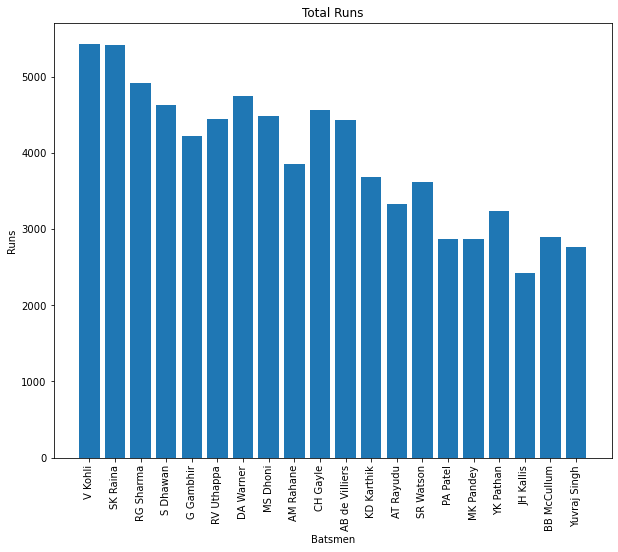

In [49]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['runs'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs')
plt.show()


Each batsmen strike rate

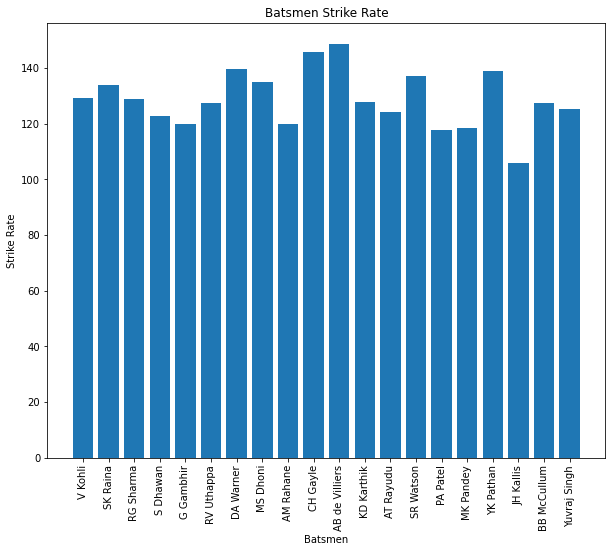

In [50]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['batting_strike_rate'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Batsmen Strike Rate')
plt.show()

Top 5 Batsmen

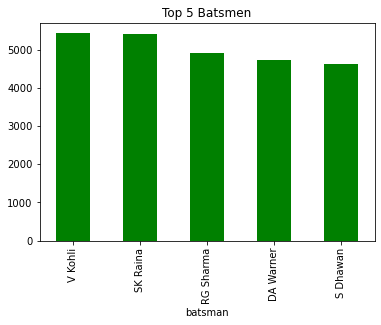

In [51]:
data_deliveries.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='Green')
plt.title("Top 5 Batsmen");

Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs.
It is an important factor for a batsman in an T20 league to maintain a good strike rate. AB de Villiers and CH Gayle have almost equal strike rates.

### Bowler information

In [52]:
bowler_wickets = data_deliveries.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlers

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136


In [53]:
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = TopBowlers.sort_values(['economy'], ascending=True)[:20]
TopBowlers

,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,136,4.293956
R Vinay Kumar,2186,3043,127,4.310220
MM Sharma,1770,2457,99,4.322344
DJ Bravo,2711,3733,168,4.357353
PP Chawla,3157,4153,156,4.561040
YS Chahal,1841,2416,102,4.572020
RP Singh,1874,2417,100,4.652048
SR Watson,2137,2751,107,4.660851
A Nehra,1974,2537,121,4.668506


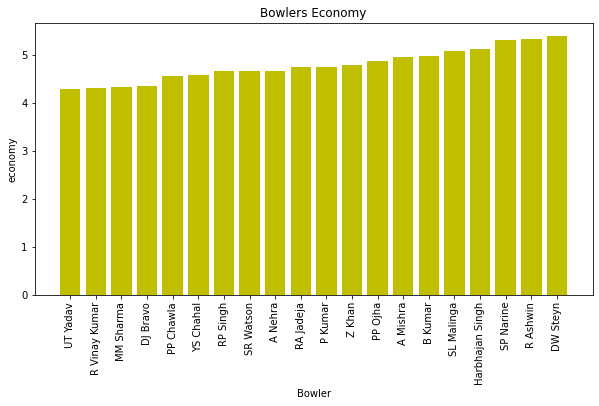

In [54]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['economy'],color='y')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('economy')
plt.title('Bowlers Economy')
plt.show()

Wickets taken by a bowler

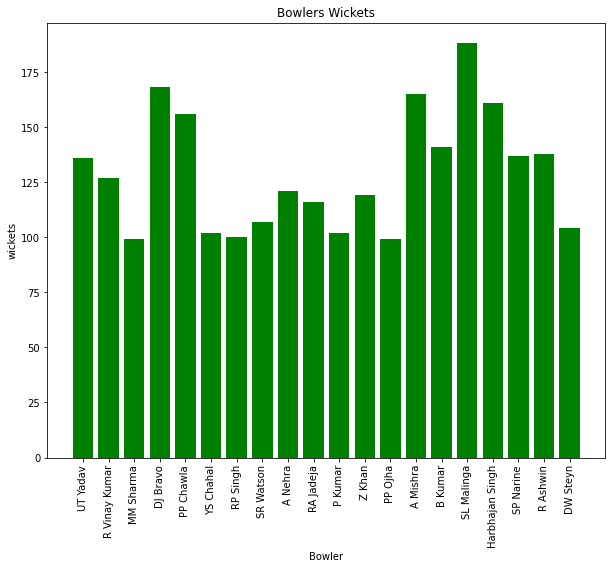

In [55]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['wickets'],color='GREEN')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('wickets')
plt.title('Bowlers Wickets')
plt.show()

Top 5 Bowlers

Text(0.5, 1.0, 'Top 5 Bowlers')

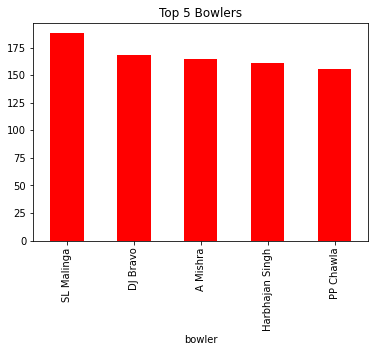

In [56]:
data_deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='r')
plt.title("Top 5 Bowlers")

Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets.

## 5. Conclusion:
1. Best Team is Mumbai Indians.
2. Best Player is CH Gayle.
3. Winning Toss and Batting first are a factor that affect the victory.
4. Most matches have been played in Eden Gardens followed by Wankhede Stadium.
5. Teams who win toss choose to field first.
6. Teams who choose to field after winning the toss have high chances of winning.
7. Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs and comapnies can also hire them to endorse products of batting.
8. Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets and comapnies can also hire them to endorse products of bowling.
9. op Players like, CH Gayle, AB de Villiers, MS Dhoni, and DA Warner can be hired by many companies to endorse their products as they have a huge fanbase.

In [ ]:
Thank you !